Santiago Alvarez Cárdenas – Sequence Analysis Course, EAFIT University - 2021

**Using V-Pipe for assessing HCV genetic diversity from NGS data.**

The pipeline integrates several open-source software packages developed for analyzing virus samples, provided in Conda (https://conda.io) environments set to automatically download and install the required tools. In short, the analysis workflow implemented by V-pipe involves quality control, reference-guided mapping and alignment of sequencing reads, and identification of SNVs and reconstruction of viral haplotypes.

V-pipe is capable of aligning sequencing reads (supporting both single and paired-end FASTQ files) using ngshmmalign (described in the paper), as well as BWA MEM and Bowtie2 to be chosen according to needs. A reference sequence can be either provided in FASTA format or constructed de novo using VICUNA software. ShoRAH and LoFreq can be used for SNV calling and local haplotype reconstruction. For more details and further reading, I strongly recommend referring to the original paper pre-print at https://doi.org/10.1101/2020.06.09.142919.

Here, I will be using V-pipe for hepatitis c virus (HCV) whole genome sequencing (WGS) reads alignment and genome reconstruction, using both refseq and de novo strategies for further Direct Acting Antivirals Resistance Associated Substitutions (DAA-RAS), haplotype reconstruction and phylogenetic analysis.

**Step 1 – Raw data search and download**

For illumina raw reads searching, I entered the SRA database at the NCBI site. There I searched for (hepacivirus c) AND "Hepacivirus C"[orgn:__txid11103] in the search box giving 5320 items and then filtered as follows: Source: RNA; Platform: Illumina; Strategy: Genome; File Type: fastq for a total 98 items. Out of those 98 results, I downloaded the 72 run accession codes list in TXT format (Supplementary File 1) corresponding to the HCV genome sequencing part of the University of Cambridge project in 2017 (NCBI BioProject Accession Number: PRJNA380188).

In order to get the SRA data, I used NCBI SRA Toolkit (https://github.com/ncbi/sra-tools/) for SRA format reads download and FASTQ format conversion as recommended by the NCBI. Using the tool, only the SraAccessionList.txt file is needed for downloading all the runs (Accession Numbers: SRR5371622-SRR5371693) there specified (for a proof of concept, I first downloaded a third (24) of the runs), then converting each file into FASTQ format file as shown in the images below:

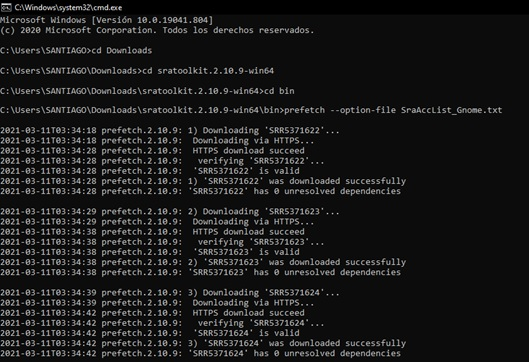

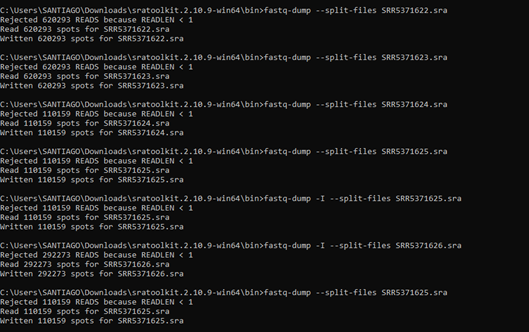

After downloading, the 24 single-end FASTQ files, they had a total weight of 3.21Gb. For further details and specifications about SRA Toolkit usage please refer to the wiki (https://github.com/ncbi/sra-tools/wiki) and the handbook (https://www.ncbi.nlm.nih.gov/books/NBK242621/).

The reference sequence has been downloaded manually from NCBI GenBank (HCV isolate H77, genotype 1) with GB Accession Number: NC_038882.1 in FASTA format.

**Step 2 – Defining the pipeline according to the study subject.**

As mentioned above, V-Pipe allows for workflow customization as organisms and study aims changes among projects. For this purpose, I will be using the following software and packages in the given order:

Conda - Conda is an open-source package management system and environment management system. V-pipe uses it to automatically obtain reproducible environments and simplify installation of the individual components of the pipeline, thanks to the Bioconda channel - a distribution of bioinformatics software.

Snakemake - Snakemake is the central workflow and dependency manager of V-pipe. It determines the order in which individual tools are invoked and checks that programs do not exit unexpectedly. Once you have conda installed, you can in turn use it to obtain Snakemake (This is the recommended way to install it). Snakemake will subsequently obtain all the necessary components to V-pipe.

FastQC - FastQC gives an overview of the raw sequencing data. Flowcells that have been overloaded or otherwise fail during sequencing can easily be determined with FastQC.

PRINSEQ - Trimming and clipping of reads is performed by PRINSEQ. It is currently the most versatile raw read processor with many customization options.
ngshmmalign	The alignment will be performed of the curated NGS data using our custom ngshmmalign that takes structural variants into account. It produces multiple consensus sequences that include either majority bases or ambiguous bases.

Samtools - The Swiss Army knife of alignment postprocessing and diagnostics.
Table 1. Out of the 18 dependencies available for use with V-Pipe, I have chosen the above 6 as those are the only ones needed for reads alignment, filtering, processing and postprocessing. The only step missing is haplotype reconstruction which is set to be assessed later in the project.

The respective dependencies and its descriptions are available in the V-Pipe web page (https://cbg-ethz.github.io/V-pipe/pipeline).



#Figure 1. Pipeline for V-Pipe usage.
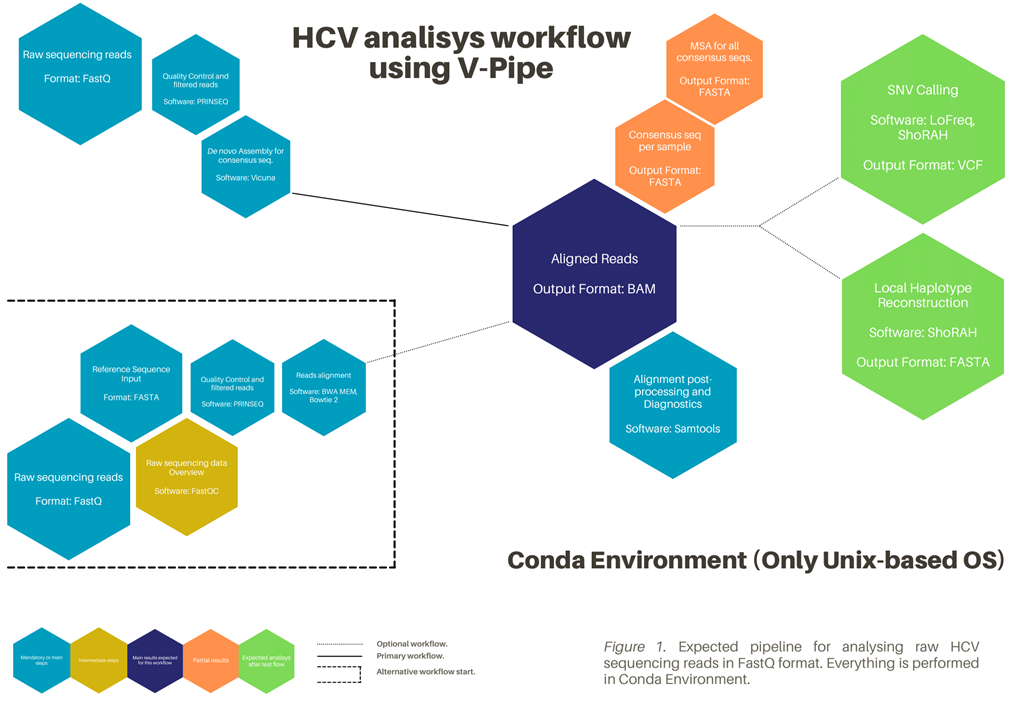

Step 3 – Initializing commands and configuring running files Assuming the installation of Conda 3.6 + in the Linux machine, the commands proceed as follows:

In [ ]:
conda install -c bioconda snakemake

# clone V-pipe into a directory of your choice
git clone https://github.com/cbg-ethz/V-pipe.git 

path/to/V-pipeDir

cd path/to/workdir
path/to/V-pipeDir/init_project.sh

./vpipe --dryrun


After the download and test running (dryrun), one should customize the "vpipe.config" file according to running specifications. Then use the command *./vpipe --use-conda -p --cores 32*. Full running commands and specifications are available at the *vpipe.sh* file provided in Supplementary materials.

For my case, this is as follows: 

In [ ]:
#vpipe.config file

[input]
samples_file = samples.tsv
paired = False
reference = references/HCVrefseqH77.fasta

[general]
aligner = bwa
snv_caller = lofreq

[output]
snv = True
local = True
global = False

[preprocessing]
extra = -ns_max_n 4 -min_qual_mean 20 -trim_qual_left 20 -trim_qual_right 20 -trim_qual_window 10

Further explanation of each of these commands and others are available at https://github.com/cbg-ethz/V-pipe/wiki/options 

The output architecture is set as follows for two given patients (out of 24 used). Further data and information can be requested at salvarezc@eafit.edu.co:


In [ ]:
#Output files architecture

working_directory
├─references
│  └─── HCVrefseqH77.fasta
├─variants
│  ├─ coverage_intervals.tsv
│  ├─ coverage.tsv
│  ├─ minority_variants.tsv
│  └─ cohort_consensus.fasta
└─samples
  ├──patient1
  │   └──5371622
  │       ├──alignments
  │       |  └──REF_aln.bam
  │       ├──preprocessed_data
  │       |  └──prinseq.out.log
  │       ├──variants
  │       |  └──SNVs
  │       |     ├──snvs.vcf
  │       |     └──snvs.csv
  │       └──references
  |          ├──ref_ambig.fasta
  |          └──ref_majority.fasta
  └──patient2
      └──5371623
           ├──alignments
           |  └──REF_aln.bam
           ├──preprocessed_data
           |  └──prinseq.out.log
           ├──variants
           |  └──SNVs
           |     ├──snvs.vcf
           |     └──snvs.csv
           └──references
              ├──ref_ambig.fasta
              └──ref_majority.fasta

The run time for vpipe, using 32 cores from Apolo Supercomputing center (Universidad EAFIT, Colombia) was 7 hours and 58 minutes with 15 secs.

As seen above, for variant calling (SNV detection) LoFreq was used instead of ShoRah as it exhibited some trouble while running, hence local haplotype reconstruction was done as proposed in the pipeline. It produced two files for coverage analysis, one for minority variants (very important to list and create haplotype according to key loci) and one cohort consensus sequence (for all 24 patient sequences).

As a result of above, a VCF File for each sample was created. Then, in a separate Linux platform, both *Tabix* and *Bgzip* were installed in order to compress and index each *snvs.vcf* file. Later, all VCFs were indexed and merged into one single VCF report using *bcftools merge* (also installed), allowing it to have a full merged record of the SNV calls.

Further, the complete SNV report were visualized using IoBio VCF platform avalible online at: "vcf.iobio.io" using both compressed file (merged.vcf.gz) and compressed tabix file (merged.vcf.gz.tbi), both provided as Supplementary material to this document. Results are shown in Figure 2. 

#Figure 2. Using IoBio VCF visualizator to better understand SNV call results.
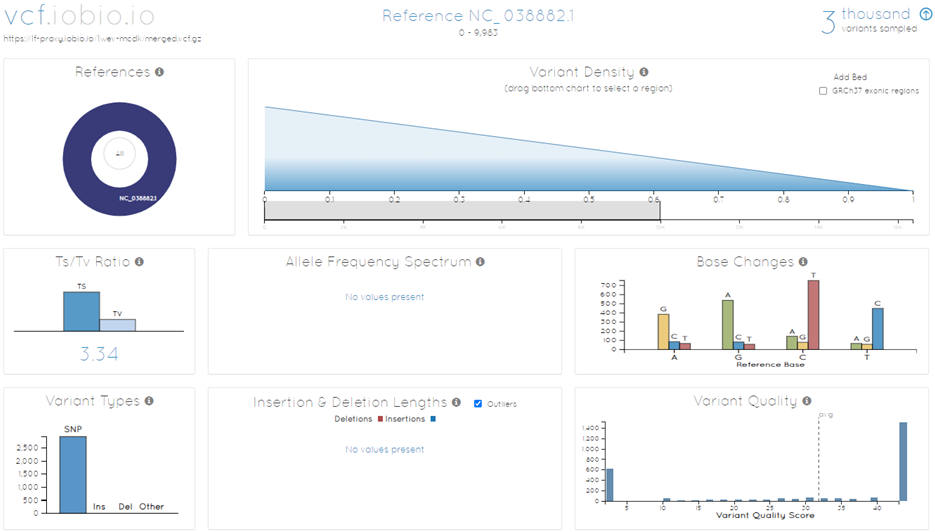

Discussion and conclusions:

As seen in Figure 2, LoFreq was able to identify almost 3,000 variants from 24 patients HCV sequences. Given that HCV genome is only 9.6 kb, it is intriguing that so many variants can be found in only 24 patients, although HCV is known for it's high rates of variation, up to 2 × 10-3 substitutions/site/year.

The Ts/Tv ratio favors the Transitions, as there are >3 Transitions for each Transversion, and it can be detailed in the "Base Changes" plot where Transitions where the most favorable case for each nucleotide. This can be explained in the sense that a Transition is less likely to produce a deletereous mutation which could decrease the viral success in it's host, therefore it is logical to assume that in chronical patients as the examined the most frequently found variants will be non-deletereous or likely, Transitions.

A better way to observe this could be reconstructing global haplotypes and then observing which variants (or haplotypes) are more likely to preserve in patients, taking advantage of the more than half of the variants reported (1521) which had a VQ score of 43, above average of 32. 

Further and deeper analysis are then needed in order to conclude about the diversity and health implications of the variants found. However, a quick analysis such as an alignment using MEGA X is provided, showing few differences during translation in what may be seen as key sites for Resistance associated substitutions, then creating an opportunity to deepen in the implications of mutation and genetic diversity.

V-pipe is a great tool for viral analysis and is yet to be fully exploited in upcoming Viral studies, they have shown their capabilites during the SARS-CoV 2 pandemic and their potential for many others human viral pathogens.

---



---

